In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

sns.set()

In [5]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
features = df.columns.drop('target')
features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [7]:
features = df.columns.drop('target')
X = pd.DataFrame(data=df, columns=features)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
Y = pd.DataFrame(df['target'])
Y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8)

In [37]:
ytrain.values.flatten()

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [38]:
tr_acc = []
ts_acc = []

for i in range(1,20):
    kmodel = KNeighborsClassifier(n_neighbors = i)
    kmodel.fit(xtrain,ytrain.values.flatten())

    tr_acc.append(kmodel.score(xtrain,ytrain))
    ts_acc.append(kmodel.score(xtest,ytest))

In [39]:
print("Training Accuracy: ", tr_acc)
print("******************************************")
print("******************************************")
print("Test Accuracy: ", ts_acc)

Training Accuracy:  [1.0, 0.7851239669421488, 0.7892561983471075, 0.743801652892562, 0.7520661157024794, 0.7479338842975206, 0.7148760330578512, 0.6983471074380165, 0.6859504132231405, 0.6776859504132231, 0.6652892561983471, 0.6942148760330579, 0.6776859504132231, 0.6859504132231405, 0.6900826446280992, 0.6900826446280992, 0.6859504132231405, 0.6735537190082644, 0.6859504132231405]
******************************************
******************************************
Test Accuracy:  [0.6229508196721312, 0.5901639344262295, 0.7213114754098361, 0.6885245901639344, 0.7377049180327869, 0.7377049180327869, 0.7868852459016393, 0.8032786885245902, 0.819672131147541, 0.7540983606557377, 0.7868852459016393, 0.7704918032786885, 0.7868852459016393, 0.7704918032786885, 0.7704918032786885, 0.7377049180327869, 0.7213114754098361, 0.7377049180327869, 0.7377049180327869]


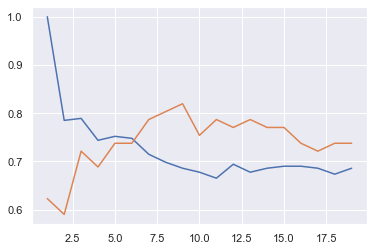

In [40]:
plt.plot(range(1,20) , tr_acc)
plt.plot(range(1,20) , ts_acc)     
plt.show()

# accuracy is best when k = 6

In [41]:
tr_acc[6]

0.7148760330578512

In [42]:
ts_acc[6]

0.7868852459016393